## Question 2: How can we improve customer retention and lifetime value?
### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from q2 import *

### Data cleaning

In [ ]:
# Read data
df = pd.read_csv('../../data.csv', low_memory=False)

# Data cleaning
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['year'] = df['purchase_date'].dt.year  # Extract the year

# Select required columns for churn analysis
churn_df = df[['customer_key', 'purchase_date']]

# Filter out rows from 2021 onwards for CLV analysis
df = df[df['year'] < 2021]  

# Select required columns
df = df[['customer_key', 'total_price', 'purchase_date', 'description', 'revenue', 'campaign_key', 'mkt_chnl_key', 'year', 'campaign_name','category']]

df

,customer_key,total_price,purchase_date,description,revenue,campaign_key,mkt_chnl_key,year,campaign_name,category
0,C002181,56.0,2014-01-20,Dishware - Cups Hot,36.0,NaN,NaN,2014,NaN,Dishware
1,C005518,64.0,2014-01-20,Food - Healthy,8.0,NaN,NaN,2014,NaN,Food
2,C002449,102.0,2014-01-20,Coffee Ground,30.0,NaN,NaN,2014,NaN,Coffee Products
3,C005284,52.0,2014-01-20,Food - Sweets,40.0,NaN,NaN,2014,NaN,Food
4,C007996,102.0,2014-01-20,Food - Healthy,18.0,NaN,NaN,2014,NaN,Food
...,...,...,...,...,...,...,...,...,...,...
991662,C002942,583.0,2020-12-31,Coffee K-Cups,484.0,2020-XMS-DEC,MKT-YOUTUBE-CHR-2020,2020,Christmas,Coffee Products
991663,C005082,84.0,2020-12-31,a. Beverage - Soda,36.0,2020-XMS-DEC,NaN,2020,Christmas,Beverage
991664,C006247,98.0,2020-12-31,a. Beverage - Soda,14.0,2020-XMS-DEC,NaN,2020,Christmas,Beverage
991665,C006497,80.0,2020-12-31,Dishware - Plates,64.0,2020-XMS-DEC,NaN,2020,Christmas,Dishware


### **Definition of Churn Rate**
Churn Rate is the **percentage of customers who stop purchasing products from our ecommerce store over a defined period of time.**

In our analysis, we will take **Churn Rate** as:

$$
\text{Churn Rate} = \frac{\text{Number of customers who did not make a purchase}}{\text{Total number of unique customers}} \times 100
$$
### **Yearly Churn Rate**

In [3]:
# Calculate the yearly churn rate
yearly_churn_df = yearly_churn(churn_df)

# Plot the yearly churn rate
plot_yearly_graph(yearly_churn_df)

### **Monthly Churn Rate**

In [6]:
# Calculate the monthly churn rate
monthly_churn_df = monthly_churn(churn_df)
print(monthly_churn_df)

      month  churn_rate
0   2014-02    0.000000
1   2014-03   29.215509
2   2014-04   27.043734
3   2014-05   27.042422
4   2014-06   27.588262
..      ...         ...
79  2020-09   25.953628
80  2020-10   27.461981
81  2020-11   25.728885
82  2020-12   28.029969
83  2021-01   26.895088

[84 rows x 2 columns]


### **Data Visualisations of Monthly Churn Rate**
#### **1. Line graph of monthly churn rate from 2014 to 2021**

In [7]:
# Plot the monthly churn rate
plot_monthly_graph(monthly_churn_df)

#### **2. Bar graph of average monthly churn rate from 2014 to 2021**

In [9]:
# Plot the bar graph of the monthly churn rate
plot_bar_graph(monthly_churn_df)

We will now proceed to analyse Customer Lifetime Value and identify at-risk customers.

### **General Analysis of Customer Lifetime Value (CLV)**

In this section, we explore the **Customer Lifetime Value (CLV)** of individual customers, calculated using all data from 2014 to 2020. 

The formula for **CLV** in our analysis is defined as:

$$
\text{CLV} = \text{Average Order Value} \times \text{Lifespan} = \left( \frac{\text{Total Revenue}}{\text{Number of Purchases}} \right) \times \text{Lifespan}
$$
​Where Lifespan is the number of years between a customer’s first and last purchase.

#### **1. Calculating CLV for Individual Customers** 

In [10]:
customer_data = individual_clv(df)

# Display the CLV results
print('Dataframe with individual CLV:')
display(customer_data[['customer_key', 'total_revenue', 'total_purchases', 'customer_lifespan', 'CLV']])

Dataframe with individual CLV:


,customer_key,total_revenue,total_purchases,customer_lifespan,CLV
0,C000001,3811.0,81,6.896646,324.482943
1,C000002,6094.0,103,6.732375,398.321299
2,C000003,7171.0,108,6.773443,449.744062
3,C000004,6390.0,118,6.850103,370.950475
4,C000005,5414.0,108,6.836413,342.706873
...,...,...,...,...,...
9186,C009187,5891.0,110,6.926762,370.959617
9187,C009188,6457.0,118,6.880219,376.487917
9188,C009189,6344.0,112,6.778919,383.977315
9189,C009190,6073.0,123,6.844627,337.946501


Columns in the DataFrame:

**customer_key**: A unique identifier for each customer.
<br>**total_revenue**: The total revenue generated by the customer from 2014-2020.
<br>**total_purchases**: The total number of purchases made by the customer from 2014-2020.
<br>**customer_lifespan**: The length of time (in years) that the customer has been active.
<br>**CLV**: The calculated Customer Lifetime Value.

Initial Insights:
<br>The above data illustrates the CLV for a sample of customers. By examining this data, we can identify high and low CLV customers and begin to analyse the drivers behind these values.

#### **2. CLV Distribution**

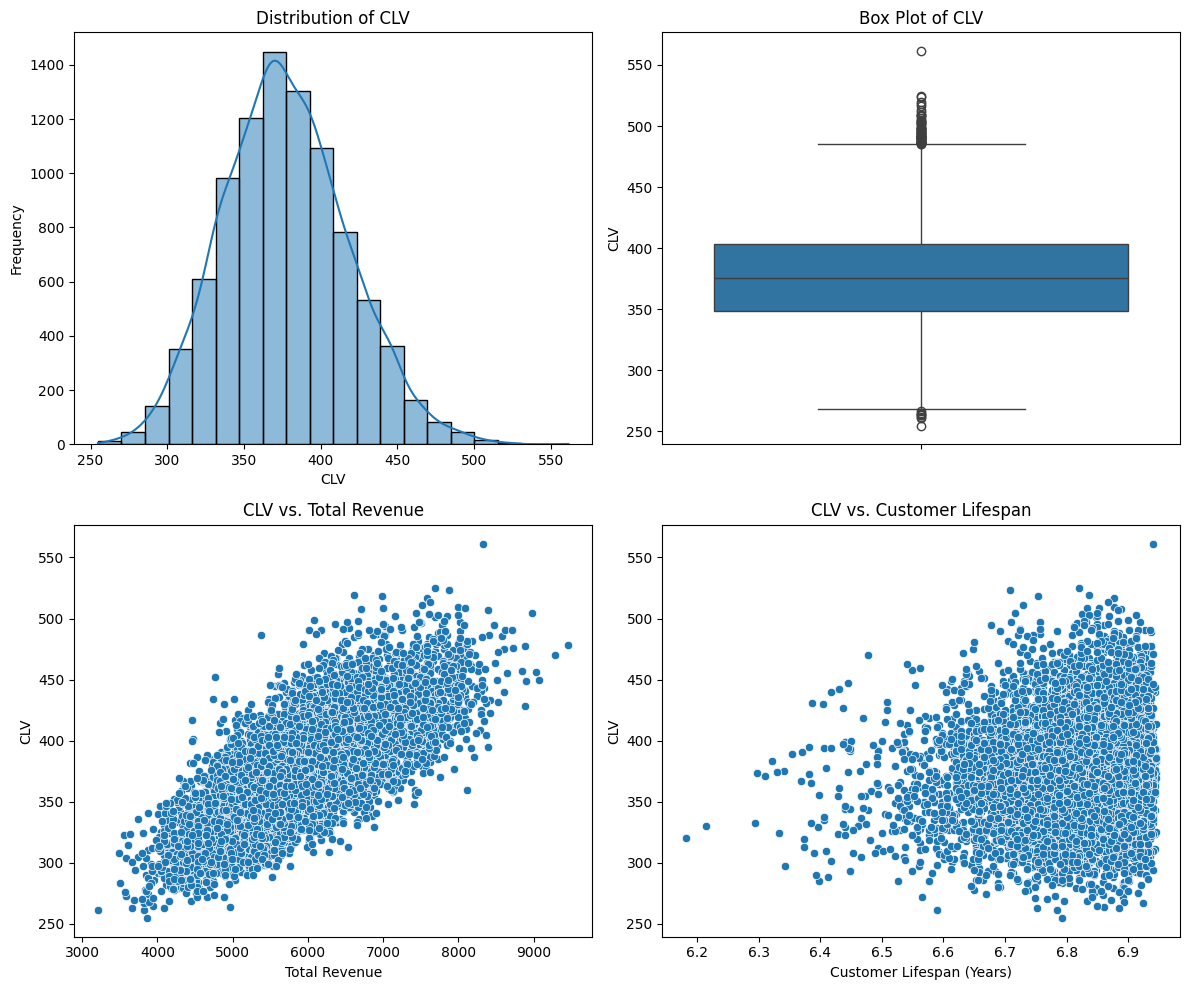

In [11]:
# Visualise CLV distribution and relationship with Total Revenue and Lifespan
clv_plot(customer_data)

#### **3. Calculating Annual CLV for Individual Customers**

In [12]:
customer_data_annual = annual_individual_clv(df)

# Display the annual CLV results for each customer and each year
print('Example: Customer C000001')
display(customer_data_annual.head(7))

Example: Customer C000001


,customer_key,year,total_revenue,total_purchases,first_purchase,last_purchase,annual_lifespan,annual_CLV
0,C000001,2014,518.0,14,2014-02-06,2014-12-06,0.829569,30.694045
1,C000001,2015,569.0,13,2015-01-13,2015-12-20,0.933607,40.863265
2,C000001,2016,585.0,9,2016-04-07,2016-12-03,0.657084,42.710472
3,C000001,2017,941.0,19,2017-02-27,2017-12-19,0.807666,40.000720
4,C000001,2018,568.0,10,2018-01-10,2018-11-27,0.878850,49.918686
5,C000001,2019,345.0,11,2019-01-17,2019-10-10,0.728268,22.841142
6,C000001,2020,285.0,5,2020-05-18,2020-12-30,0.618754,35.268994


The above data illustrates annual CLV for each year for a sample of customers. To identify at-risk customers each year, we will use annual CLV as a guideline.

#### **4. Annual CLV Distribution**

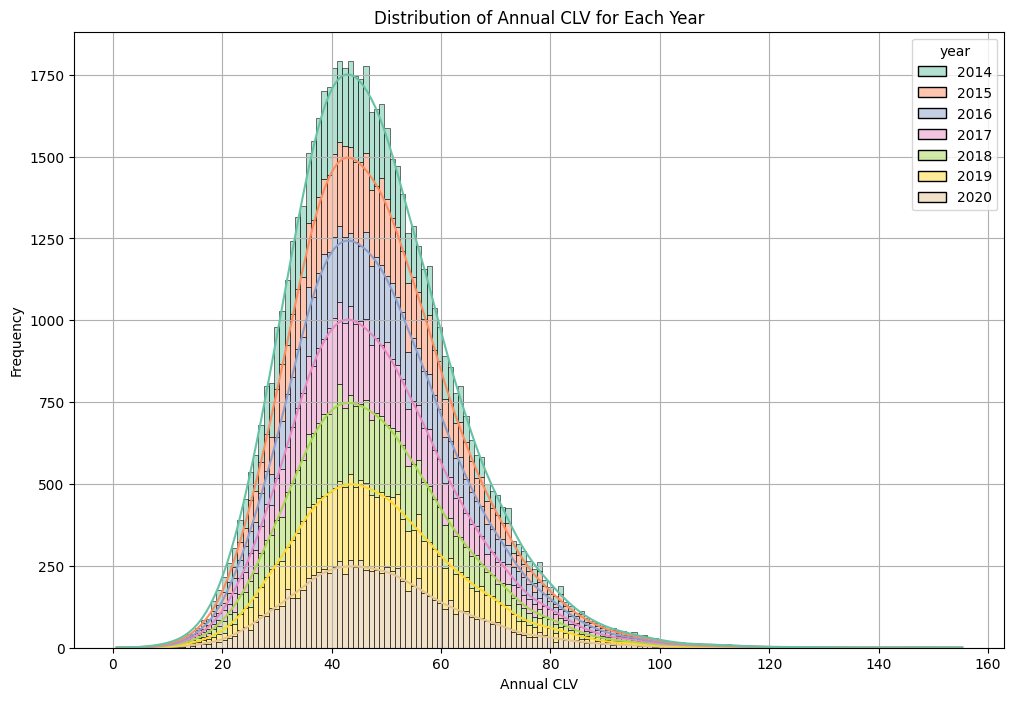

In [13]:
# Visualise annual CLV distribution
annual_CLV_plot(customer_data_annual)

### **Identifying At-Risk Customers of Each Year**
**At-Risk Criteria**

To classify customers as "at-risk" for each year, we use the following criteria (satisfy *both*):

>1. **Lower Quartile Customer Lifetime Value (CLV)**: Customers with a CLV below the lower quartile of the year's distribution.
>2. **Below Mean Purchase Frequency**: Customers whose purchase frequency (number of transactions) falls below the mean of the year's distribution.

#### **1. Customers with Annual CLV Below Lower Quartile**

In [14]:
low_clv_threshold_yearly = low_clv(customer_data_annual)[0]
low_clv_customers_by_year = low_clv(customer_data_annual)[1]

# Print the low CLV threshold per year
print("Low CLV Threshold for Each Year:")
display(low_clv_threshold_yearly)

# Print the low-CLV customers for every year
for year in range(2014, 2021):
    # Store the at-risk customers for that year
    low_clv_customers = low_clv_customers_by_year[year]

    print(f"\nLow-CLV Customers for Year {year}:")
    print(low_clv_customers[['customer_key', 'annual_CLV']])
    print(f"Number of low-CLV customers for year {year}: {low_clv_customers.shape[0]}")

Low CLV Threshold for Each Year:


,year,low_clv_threshold
0,2014,35.262149
1,2015,37.170583
2,2016,37.869982
3,2017,37.663415
4,2018,37.482369
5,2019,37.698591
6,2020,38.014497



Low-CLV Customers for Year 2014:
      customer_key  annual_CLV
0          C000001   30.694045
28         C000005   35.105206
49         C000008   29.107187
56         C000009   27.829275
70         C000011   32.772074
...            ...         ...
64190      C009171   34.218080
64239      C009178   32.731006
64281      C009184   19.039014
64288      C009185   12.985170
64295      C009186   30.638741

[2298 rows x 2 columns]
Number of low-CLV customers for year 2014: 2298

Low-CLV Customers for Year 2015:
      customer_key  annual_CLV
22         C000004   32.490662
50         C000008   26.036179
78         C000012   21.906457
92         C000014   33.213673
106        C000016   20.788159
...            ...         ...
64170      C009168   30.933923
64254      C009180   20.572211
64289      C009185   33.727373
64310      C009188   33.348516
64317      C009189   26.622861

[2298 rows x 2 columns]
Number of low-CLV customers for year 2015: 2298

Low-CLV Customers for Year 2016:
      cu

#### **2. At-Risk Customers of Each Year**
Our at-risk customers are defined as those who exhibit both low CLV and low purchase frequency. These customers are at a higher risk of churn, as they generate minimal value and make fewer purchases over time.

In [15]:
# Print the at-risk customers for every year
at_risk_customers_yearly(low_clv_customers_by_year)


At-Risk Customers for Year 2014:


,customer_key,annual_CLV,low_clv_threshold
0,C000011,32.772074,35.262149
1,C000017,33.435897,35.262149
2,C000028,10.694045,35.262149
3,C000038,27.333439,35.262149
4,C000044,33.949350,35.262149


Number of at-risk customers for year 2014: 1145

At-Risk Customers for Year 2015:


,customer_key,annual_CLV,low_clv_threshold
0,C000004,32.490662,37.170583
1,C000008,26.036179,37.170583
2,C000012,21.906457,37.170583
3,C000022,37.141684,37.170583
4,C000048,32.821812,37.170583


Number of at-risk customers for year 2015: 1228

At-Risk Customers for Year 2016:


,customer_key,annual_CLV,low_clv_threshold
0,C000009,36.424914,37.869982
1,C000010,24.543588,37.869982
2,C000012,32.857495,37.869982
3,C000017,30.522734,37.869982
4,C000020,37.303715,37.869982


Number of at-risk customers for year 2016: 1245

At-Risk Customers for Year 2017:


,customer_key,annual_CLV,low_clv_threshold
0,C000002,37.209674,37.663415
1,C000010,22.289264,37.663415
2,C000013,30.826936,37.663415
3,C000030,26.624546,37.663415
4,C000032,28.433363,37.663415


Number of at-risk customers for year 2017: 1228

At-Risk Customers for Year 2018:


,customer_key,annual_CLV,low_clv_threshold
0,C000005,30.555161,37.482369
1,C000011,28.418049,37.482369
2,C000021,29.803401,37.482369
3,C000024,35.545908,37.482369
4,C000025,32.057744,37.482369


Number of at-risk customers for year 2018: 1225

At-Risk Customers for Year 2019:


,customer_key,annual_CLV,low_clv_threshold
0,C000001,22.841142,37.698591
1,C000014,29.947199,37.698591
2,C000023,29.149400,37.698591
3,C000032,35.198652,37.698591
4,C000042,29.353551,37.698591


Number of at-risk customers for year 2019: 1268

At-Risk Customers for Year 2020:


,customer_key,annual_CLV,low_clv_threshold
0,C000001,35.268994,38.014497
1,C000003,29.242300,38.014497
2,C000005,30.707050,38.014497
3,C000008,37.172028,38.014497
4,C000014,29.246700,38.014497


Number of at-risk customers for year 2020: 1241


### **High CLV Customers and Their Purchasing Behaviour**

In this section, we will analyse the Average Order Value (AOV) of high CLV customers by Product Category. 
<br>AOV represents the average spend per transaction and is calculated as:
$$
\text{Average Order Value (AOV)} = \frac{\text{Total Revenue}}{\text{Total Number of Purchases}}
$$

In [16]:
# Identify high CLV customers
high_clv_customers = high_clv(customer_data)
print('High CLV customers (upper quartile CLV):')
display(high_clv_customers)

# Display the categories purchased by high CLV customers by AOV
print('AOV by Category of high CLV customers:')
top_categories(df, high_clv_customers)

High CLV customers (upper quartile CLV):


,customer_key,total_revenue,total_purchases,first_purchase,last_purchase,customer_lifespan,CLV
2,C000003,7171.0,108,2014-01-24,2020-11-02,6.773443,449.744062
5,C000006,7020.0,108,2014-01-25,2020-11-18,6.814511,442.943190
6,C000007,7022.0,120,2014-01-24,2020-12-20,6.904860,404.049373
17,C000018,7247.0,109,2014-03-17,2020-12-24,6.773443,450.340737
21,C000022,5028.0,81,2014-02-22,2020-11-12,6.721424,417.226152
...,...,...,...,...,...,...,...
9167,C009168,8335.0,133,2014-01-21,2020-12-26,6.929500,434.266055
9168,C009169,6564.0,107,2014-03-21,2020-11-22,6.674880,409.475830
9172,C009173,7861.0,121,2014-01-30,2020-12-30,6.915811,449.299099
9174,C009175,7210.0,112,2014-01-20,2020-12-29,6.940452,446.791581


AOV by Category of high CLV customers:


,category,total_revenue,total_purchases,aov
1,Coffee Products,3012620.0,31275,96.326779
5,Kitchen Supplies,1280022.0,18254,70.122822
0,Beverage,5373209.0,90182,59.581835
3,Food,4498557.0,80037,56.205967
2,Dishware,1011900.0,18326,55.216632
4,Gum,327828.0,7433,44.104399
6,Medicine,45622.0,1738,26.249712
